In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
#Loading Dataset

In [7]:
df=pd.read_csv("Desktop/tested.csv")

In [8]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#data exploration and preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [15]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [20]:
df.drop("Cabin", axis=1, inplace=True)

In [22]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [27]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


AttributeError: 'numpy.int32' object has no attribute 'startswith'

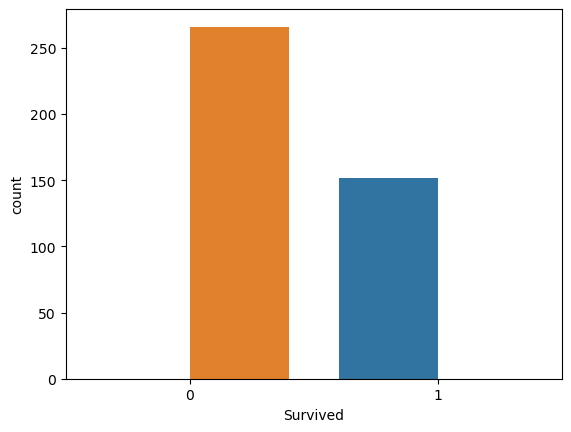

In [28]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival based on gender")
plt.show()

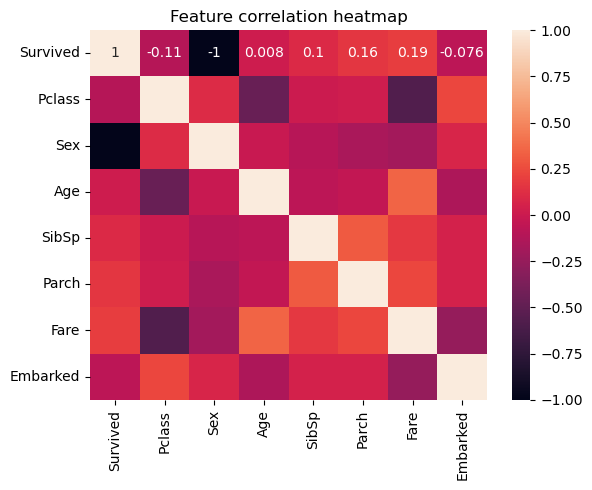

In [30]:
sns.heatmap(df.corr(), annot=True)
plt.title("Feature correlation heatmap")
plt.show()

In [52]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [53]:
#model building

In [54]:
x=df.drop("Survived",axis=1)

In [55]:
y=df["Survived"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred=model.predict(x_test)

In [66]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
 [[50  0]
 [ 0 34]]


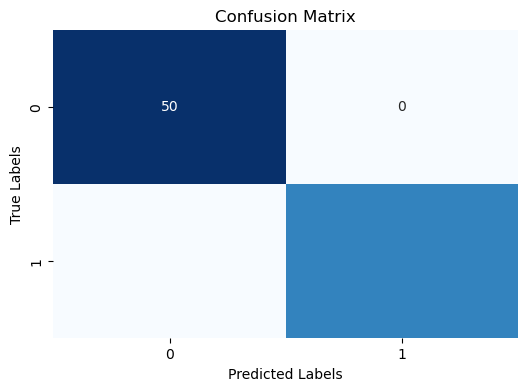

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

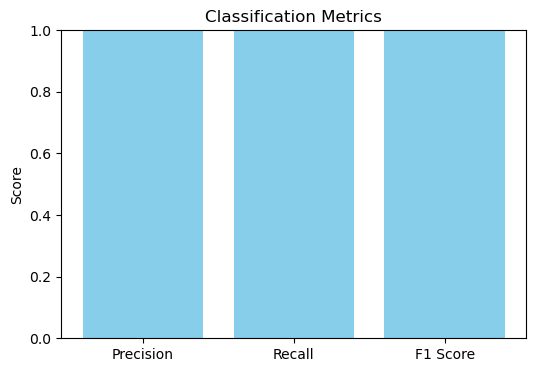

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar chart
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.show()


In [74]:
import pandas as pd

# Take user input
pclass = int(input("Enter Passenger Class (1/2/3): "))
sex = input("Enter Sex (male/female): ").lower()
age = float(input("Enter Age: "))
sibsp = int(input("Enter number of siblings/spouses aboard: "))
parch = int(input("Enter number of parents/children aboard: "))
fare = float(input("Enter Fare: "))
embarked = input("Enter Embarked (C/Q/S): ").upper()

# Encode values same as training data
sex = 1 if sex == 'male' else 0
embarked_map = {'C': 0, 'Q': 1, 'S': 2}
embarked = embarked_map.get(embarked, 2)

# Create DataFrame
user_input = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]],
                          columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

# Make prediction
prediction = model.predict(user_input)[0]

# Output result
print("\n Prediction:", "Survived" if prediction == 1 else "Did Not Survive ")


Enter Passenger Class (1/2/3):  2
Enter Sex (male/female):  1
Enter Age:  36
Enter number of siblings/spouses aboard:  1
Enter number of parents/children aboard:  1
Enter Fare:  5
Enter Embarked (C/Q/S):  S



 Prediction: Survived
